### Computer specs and Environment
- Python 3.6
- Wind OS
- Date 08/12/2018

In [87]:
#importing necessary libraries 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [88]:
#Loading the datasets
berlin_atm = pd.read_json('berlin_atms.json')
berlin_gas_stations = pd.read_json('berlin_gas_stations.json')
berlin_restaurant = pd.read_json('berlin_restaurants.json')
berlin_stations = pd.read_json('berlin_stations.json')
berlin_supermarkets = pd.read_json('berlin_supermarkets.json')

I noticed there was an embedded JSON dictionary inside th "tags" column. In order for me to parse it out I used 
"apply(pd.Series)" to convert the dictionary into a dataframe.

In [90]:
berlin_restaurant_tag = berlin_restaurant['tags'].apply(pd.Series)
berlin_atm_tag = berlin_atm['tags'].apply(pd.Series)
berlin_supermarkets_tag = berlin_supermarkets['tags'].apply(pd.Series)

By default pandas do not show all columns and to see all column and analyse it I used "pd.set_option('display.max_columns', None)".

In [98]:
pd.set_option('display.max_columns', None)
berlin_restaurant_tag.head()

,addr:city,addr:country,addr:postcode,addr:street,addr:suburb,amenity,cuisine,name,toilets:wheelchair,website,wheelchair,addr:housenumber,wheelchair:description,opening_hours,phone,diet:vegan,contact:phone,contact:website,level,email,operator,outdoor_seating,smoking,internet_access,entrance,fax,smoking:outside,opening_hours:kitchen,contact:email,contact:fax,capacity,addr:housenumber2,addr:street2,note,source,old_name,ref:vatin,description,type,alt_name,microbrewery,contact:facebook,fixme,payment:credit_cards,place_nr,drive_in,organic,takeaway,wikidata,beer_garden,diet:vegetarian,opening_hours:winter,biergarten,delivery,drink:club-mate,internet_access:ssid,payment:MensaCard,diet:gluten_free,image,addr:housename,tourism,payment:account_cards,payment:cash,payment:girocard,opening_hours:signed,contact:phone:office,contact:phone:service,cocktails,drink:beer,drink:liquor,drink:wine,note:de,payment:bitcoin,yelp,ice_cream_counter,created_by,wikipedia,owner,addr:inclusion,url,name:en,disused:amenity,survey:date,surveillance,internet_access:fee,contact:mobile,addr:district,service_times,wlan,check_date,payment:debit_cards,brewery,payment:mastercard,payment:visa,bicycle_parking,terrace,brand,last_checked,ft_link,start_date,blind:description:de,wheelchair:source,name:zh,payment:american_express,lunch,menu:url,payment:maestro,internet_access:operator,ref,diet:pescetarian,name:de,operator:type,toilets,lastcheck,shop,opening_hours:shop,layer,source:addr,name:ar,name:ru,ele,sport,vending,wifi,contact:bookatable,capacity:outdoors,payment:coins,payment:notes,source:amenity,phone:mobile,drive_through,vegan,vegetarian,sushi,capacity:persons,size,payment:electronic_purses,payment:telephone_cards,identity,postal_addr:city,postal_addr:postcode,postal_addr:street,contact:foursquare,contact:yelp,link:berlin.de,link:qype,internet_access:type,pay_tv:sky,access,blind:audio:de,blind:website:de,wheelchair:description:de,bar,cafe,designation,facebook,disused:cuisine,addr:place,reservation,diet:halal,drink:alcohol,indoor,addr:floor,food,stars,roof:shape,payment:cryptocurrencies,payment:ec_cards,wheelchair:description:en,official_name,phone_1,restaurant,name:bg,name:ja,name:it,catering,cuisine_1,comment,description:de,atm,addr:subdistrict,name:ko,craft,concert_location,addr:level,currency:EUR,cuisine_2,cuisine_3,cuisine_4,lunch:menu,short_name,dance:style,leisure,toilets:access,payment:contactless,name:es,note:en,live music,source:opening_hours,delivery:partner,breakfast,capacity:outdoor_seating,self_service,instagram
0,Berlin,DE,10623,KnesebeckstraÃŸe,Charlottenburg,restaurant,italian,Aida,yes,http://www.aida-restaurant.de/,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Berlin,DE,10623,KantstraÃŸe,Charlottenburg,restaurant,NaN,Madame Ngo,NaN,http://madame-ngo.de/,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

After examining JSON dictionary, the "cousine" column looked interesting and found out that Italian food was the most popular followed by German and Vietnamese food

In [11]:
berlin_restaurant_tag.cuisine.value_counts().head(10)

italian       621
german        219
indian        170
vietnamese    156
asian         155
regional      120
chinese       101
greek         100
sushi          72
thai           66
Name: cuisine, dtype: int64

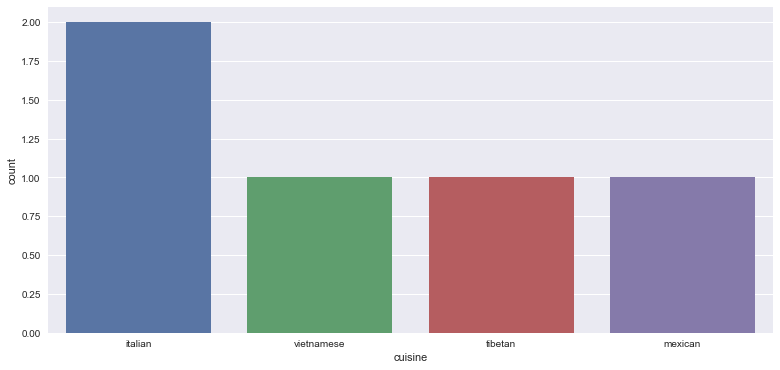

In [69]:
plt.figure(figsize=(13,6))
sns.countplot(berlin_restaurant_tag.cuisine.head(7))
sns.set(style="darkgrid")

## Clusterizing stations to create n regions

##### When we look at the datasets a hypothesis comes to mind that there should be some relationships among the locations of supermarkets, ATMs and restaurants. Lets deep dive and look at if there are any correlations. For this I will use stations' lat and lon for creating some centroids(regions) and then analyse how other locations are distributed

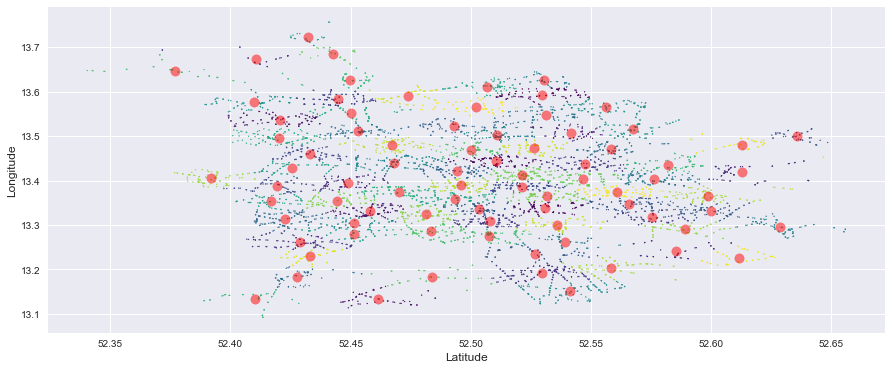

In [99]:
X_station=berlin_stations.loc[:,['lat','lon']]

id_n=80 
kmeans = KMeans(n_clusters=id_n, random_state=0)
kmeans.fit(X_station)
y_kmeans = kmeans.predict(X_station) 
plt.figure(figsize=(15,6))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.scatter(X_station.lat[:], X_station.lon[:], c=y_kmeans, s=1, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',c='red', s=90, alpha=0.5)

## Restaurants, Markets and Atms by regions

In [85]:
def get_nearest_region(x,y,regions=centers):
    return np.argmin([(mx-x)**2+(my-y)**2 for mx,my in regions])

In [89]:
#atms
XY_berlin_atm = berlin_atm.loc[:,['lat','lon']]
XY_berlin_atm['region'] =  XY_berlin_atm.apply(lambda row: get_nearest_region(row['lat'], row['lon']), axis=1)
atm_counts=XY_berlin_atm.groupby('region').size().reset_index(name='atm_counts')
#restaurants
XY_berlin_restaurant = berlin_restaurant.loc[:,['lat','lon']]
XY_berlin_restaurant['region'] =  berlin_restaurant.apply(lambda row: get_nearest_region(row['lat'], row['lon']), axis=1) 
restaurant_counts=XY_berlin_restaurant.groupby('region').size().reset_index(name='restaurant_counts')
#supermarkets
XY_berlin_supermarkets = berlin_supermarkets.loc[:,['lat','lon']]
XY_berlin_supermarkets['region'] =  berlin_supermarkets.apply(lambda row: get_nearest_region(row['lat'], row['lon']), axis=1)
supermarket_counts=XY_berlin_supermarkets.groupby('region').size().reset_index(name='supermarket_counts')
#merge all
regional_counts = pd.merge(supermarket_counts,pd.merge(restaurant_counts,atm_counts))
regional_counts.head()

,region,supermarket_counts,restaurant_counts,atm_counts
0,0,8,19,19
1,1,25,105,25
2,2,23,175,59
3,3,3,12,6
4,4,5,28,10


#### The following pairplot and correlation matrix show that how strongly markets, restaurants and atms locations are correlated to each other

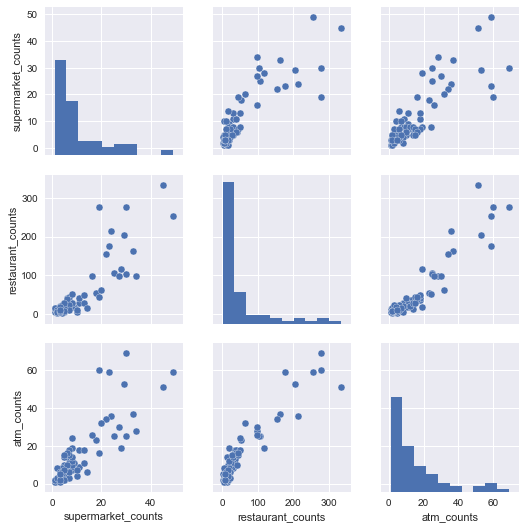

In [92]:
sns.pairplot(regional_counts.iloc[:,1:])

                    supermarket_counts  restaurant_counts  atm_counts
supermarket_counts            1.000000           0.860387    0.839442
restaurant_counts             0.860387           1.000000    0.935473
atm_counts                    0.839442           0.935473    1.000000


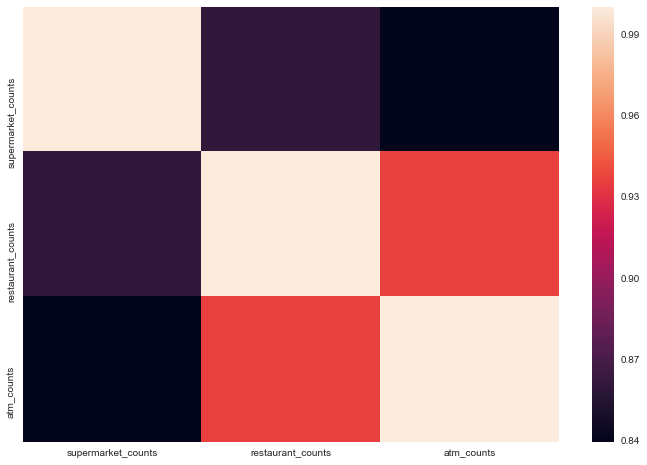

In [97]:
corr=regional_counts.iloc[:,1:].corr()
print(corr)
plt.figure(figsize=(12,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### As we expected there is a strong dependence between markets, restaurants and atms locations